# Семинар 8. Снижение размерностей

Подключение библиотек. 
$
\newcommand{\R}{\mathbb{R}}
\newcommand{\X}{\mathbb{X}}
\newcommand{\norm}[1]{\lVert #1 \rVert}
\newcommand{\abs}[1]{\left| #1 \right|}
\newcommand{\E}{\mathbb{E}}
\newcommand{\D}{\mathbb{D}}
\renewcommand{\Prob}{\mathbb{P}}
\renewcommand{\le}{\leqslant}
\renewcommand{\ge}{\geqslant}
\newcommand{\eps}{\varepsilon}
\newcommand{\Normal}{\mathcal{N}}
\DeclareMathOperator{\TP}{TP}
\DeclareMathOperator{\FP}{FP}
\DeclareMathOperator{\TN}{TN}
\DeclareMathOperator{\FN}{FN}
\DeclareMathOperator{\Accuracy}{Accuracy}
\DeclareMathOperator{\Precision}{Precision}
\DeclareMathOperator{\Recall}{Recall}
\DeclareMathOperator{\Fscore}{F_1}
\DeclareMathOperator{\MSE}{MSE}
\DeclareMathOperator{\RMSE}{RMSE}
\DeclareMathOperator{\MAE}{MAE}
\DeclareMathOperator{\MAPE}{MAPE}
\DeclareMathOperator{\Rsqured}{R^2}
$

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as wg

from matplotlib.colors import ListedColormap
from IPython.display import Markdown

from sklearn.metrics import classification_report
from sklearn import set_config

import warnings
warnings.filterwarnings("ignore", 'This pattern has match groups')

set_config(display='diagram')

cm_bright = ListedColormap(['red', 'blue'])
cm = plt.cm.get_cmap('RdBu')
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
def draw_image(img, ax=None):
    d = img.shape[-1]
    d = int(np.sqrt(d))
    img = 1 - np.array(img).reshape(-1, d)
    if ax is None:
        plt.figure(0, (4, 4))
        plt.imshow(img, cmap='Greys')
        plt.axis('off')
        plt.show()
    else:
        ax.imshow(img, cmap='Greys')
        ax.set_axis_off()
    return

In [3]:
from sklearn.datasets import fetch_olivetti_faces


olivetti = fetch_olivetti_faces()
Markdown(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   =====================
    Classes                                40
    Samples total                         400
    Dimensionality                       4096
    Features            real, between 0 and 1
    =================   =====================

The image is quantized to 256 grey levels and stored as unsigned 8-bit 
integers; the loader will convert these to floating point values on the 
interval [0, 1], which are easier to work with for many algorithms.

The "target" for this database is an integer from 0 to 39 indicating the
identity of the person pictured; however, with only 10 examples per class, this
relatively small dataset is more interesting from an unsupervised or
semi-supervised perspective.

The original dataset consisted of 92 x 112, while the version available here
consists of 64x64 images.

When using these images, please give credit to AT&T Laboratories Cambridge.


In [4]:
X = olivetti.data
y = olivetti.target

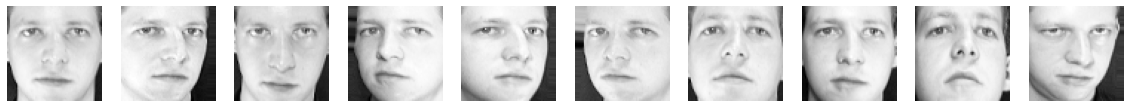

In [5]:
k = 10
_, axes = plt.subplots(1, k, figsize=(2 * k, 2))

for img, ax in zip(X, axes):
    draw_image(img, ax)
plt.show()

In [6]:
64 * 64

4096

In [7]:
X.shape

(400, 4096)

In [8]:
# максимальное число компонент: 400

# 1. Метод главных компонент

Применим метод главных компонент для сжатия размерностей.

Основные свойства:
* информативность признаков убывает;
* признаки некоррелированы;
* преобразование обратимо (можно вернуться из нового пр-ва в старое);
* максимальное число компонент: `min(N, d)`;
* можно использовать как препроцессинг данных.

In [9]:
from sklearn.decomposition import PCA


n_components = 400

pca = PCA(n_components)
pca.fit(X)

PCA(n_components=400)

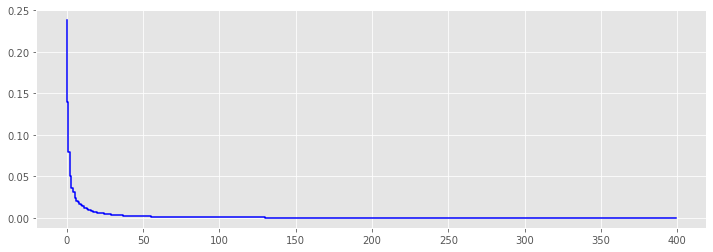

In [10]:
plt.figure(0, (12, 4))
explained = pca.explained_variance_ratio_

plt.step(np.arange(n_components), explained, color='blue')
plt.show()

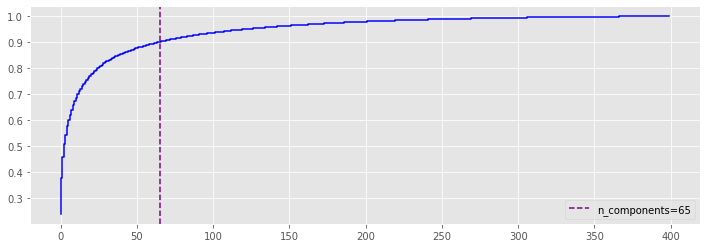

In [11]:
plt.figure(0, (12, 4))
explained = pca.explained_variance_ratio_.cumsum()

level = 0.9
n_components_opt = (explained < level).sum()

plt.step(np.arange(n_components), explained, color='blue',)
plt.axvline(n_components_opt, color='purple', ls='--', label=f'n_components={n_components_opt}')
plt.legend()
plt.show()

In [12]:
# 4096 -> 122 с потерей 5%

Посмотрим как выглядят лица после реконструкции:

In [13]:
pca = PCA(n_components_opt)
pca.fit(X)

PCA(n_components=65)

In [14]:
img = X[0]

img_pca = (X[0] - pca.mean_) @ pca.components_.T
print(img_pca)

[-6.432607   -0.70367336 -1.4300232   1.2785352   2.5643914  -0.9506042
  2.0817657  -2.9379416  -0.3738962   0.24312285 -1.3543109   1.1725675
  0.39206865  0.35819262  0.7541879   0.27037773  0.51472443 -0.5964382
 -0.15577966 -0.28318563  0.13554774  0.73588145 -0.1247545   0.42589024
  0.49924764 -0.50762653  0.7128842  -0.15010168 -0.02919001  0.5983353
 -0.51060206  0.34229264 -0.08925177  0.8118654   0.13324396 -0.1861599
 -0.31274667 -0.5675926  -0.39519912  0.50545704  0.26860368  0.16120756
  0.0282167   0.5655768  -0.45413142  0.2812516  -0.3168377   0.28741205
  0.25133166  0.6140766   0.38791054 -0.10291827 -0.18650834  0.10297522
  0.06077545  0.02094851  1.0518366  -0.06021478 -0.24620369  0.36779717
  0.13014224  0.76985335 -0.1668884  -0.33365926 -0.06818089]


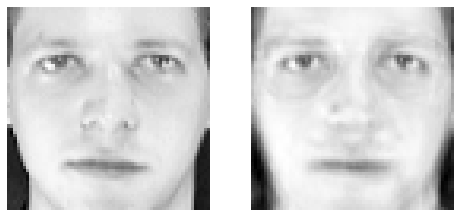

In [15]:
img_reconstructed = img_pca @ pca.components_ + pca.mean_

_, [ax1, ax2] = plt.subplots(1, 2, figsize=(8, 4))
draw_image(img, ax1)
draw_image(img_reconstructed, ax2)
plt.show()

In [16]:
X.shape

(400, 4096)

In [17]:
# хранение картинок
# 64 * 64 -> 4096
# 0-1, 0 = black, 1 = white, 0-1 = greys

In [18]:
# uint8: 0-255 -> float32: X / 255
# pixel = 8 bit

In [19]:
# 64 * 64 * 3 -> 3 * 4096 = 12288
# RGB: pixel = 24 bit = 3 * 8 bit = 3 * (0-255)
## RGBA: 32 bit

In [20]:
len(np.unique(X.flatten()))

240

In [21]:
X.dtype

dtype('float32')

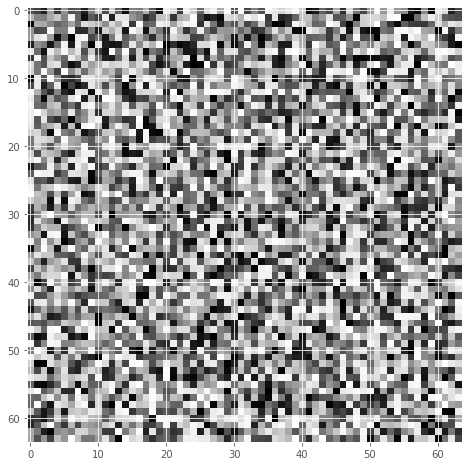

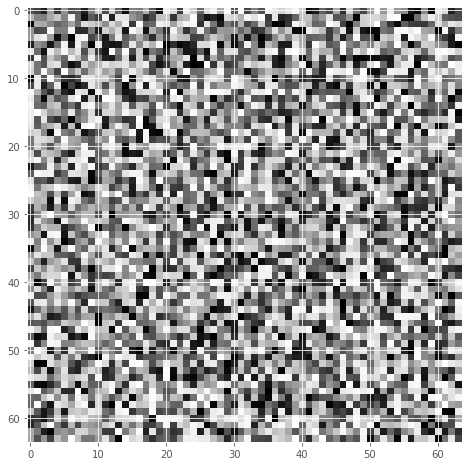

In [22]:
img = np.random.uniform(size=(64, 64))

plt.imshow(img, cmap='Greys')
plt.show()

# матрица в вектор
X_img = img.reshape(1, -1)
X_img.shape

# вектор в матрицу
img_restore = X_img.reshape(64, 64)
plt.imshow(img_restore, cmap='Greys')
plt.show()

Стандартные методы PCA:

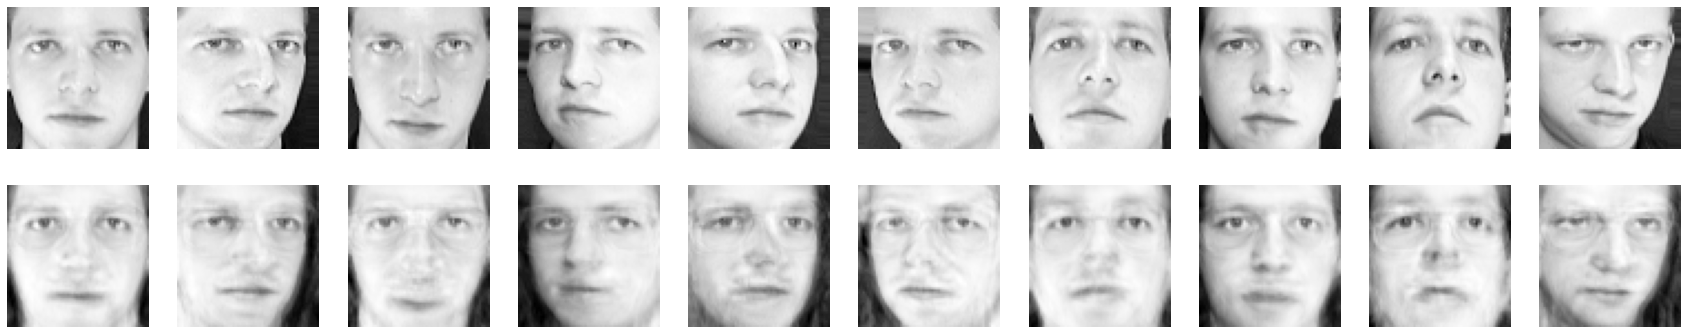

In [23]:
X_pca = pca.transform(X)
X_rec = pca.inverse_transform(X_pca)

k = 10
_, axes = plt.subplots(2, k, figsize=(3 * k, 6))
for img, img_rec, [ax1, ax2] in zip(X, X_rec, axes.T):
    draw_image(img, ax1)
    draw_image(img_rec, ax2)

Посмотрим на качество в зависимости от числа компонент:

In [24]:
plot_output = wg.Output()

def viz(n_comp):
    X = olivetti.data
    
    pca = PCA(n_comp, random_state=42)
    pca.fit(X)
    
    k = 10
    X_pca = pca.transform(X[:k])
    X_rec = pca.inverse_transform(X_pca)

    with plot_output:
        plot_output.clear_output(wait=True)
        _, axes = plt.subplots(2, k, figsize=(2 * k, 4))
        for img, img_rec, [ax1, ax2] in zip(X, X_rec, axes.T):
            draw_image(img, ax1)
            draw_image(img_rec, ax2)
        plt.show()
    
    
wg.interact(
    viz,
    n_comp=wg.IntSlider(min=1, max=400, value=65)
)
display(plot_output)

interactive(children=(IntSlider(value=65, description='n_comp', max=400, min=1), Output()), _dom_classes=('wid…

Output()

In [25]:
pca.components_.shape

(65, 4096)

Смотрим на собственные вектора:

In [30]:
X_pca[0]

array([-6.432612  , -0.70367336, -1.4300239 ,  1.2785351 ,  2.5643916 ,
       -0.9506033 ,  2.0817661 , -2.93794   , -0.37389624,  0.24312264,
       -1.3543108 ,  1.1725669 ,  0.39206877,  0.35819256,  0.75418884,
        0.27037758,  0.51472396, -0.59643805, -0.15577883, -0.28318596,
        0.13554722,  0.7358814 , -0.12475504,  0.42589056,  0.49924803,
       -0.5076264 ,  0.71288455, -0.15010196, -0.02919048,  0.5983354 ,
       -0.51060194,  0.34229273, -0.08925164,  0.8118643 ,  0.1332439 ,
       -0.18616031, -0.31274697, -0.56759244, -0.3951989 ,  0.5054567 ,
        0.2686036 ,  0.1612072 ,  0.02821663,  0.5655768 , -0.45413125,
        0.28125167, -0.31683785,  0.28741223,  0.25133145,  0.6140765 ,
        0.38791057, -0.10291794, -0.18650839,  0.10297519,  0.06077552,
        0.02094846,  1.051837  , -0.06021496, -0.24620336,  0.3677971 ,
        0.13014233,  0.76985323, -0.1668884 , -0.3336593 , -0.06818086],
      dtype=float32)

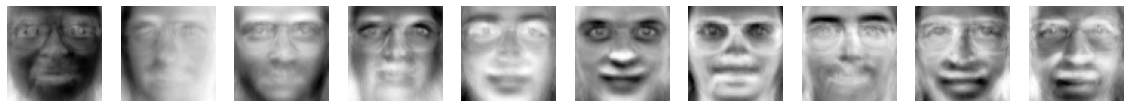

In [32]:
k = 10
_, axes = plt.subplots(1, k, figsize=(2 * k, 2))

for img, ax in zip(pca.components_, axes):
    draw_image(img, ax)
plt.show()

In [ ]:
# pca.mean_ + w @ pca.components_

In [74]:
output = wg.Output()

pca_10 = PCA(10, random_state=42)
pca_10.fit(X)

def viz(k0, k1, k2, k3, k4, k5, k6, k7, k8, k9):
    img_pca = np.array([k0, k1, k2, k3, k4, k5, k6, k7, k8, k9])
    img = pca_10.inverse_transform(img_pca.reshape(1, -1))

    with plot_output:
        plot_output.clear_output(wait=True)
        draw_image(img)
        plt.show()
        
comps = {
    f'k{i}': wg.FloatSlider(min=-3 * s, max=3 * s, value=0, step=0.01)
    for i, s in zip(range(10), X_pca.std(axis=0))
} 

wg.interact(
    viz,
    **comps
)
display(plot_output)

interactive(children=(FloatSlider(value=0.0, description='k0', max=40.12687181947379, min=-40.12687181947379, …

Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': '<Figure size 288x288 with 1 Axes>', 'i…

In [ ]:
# autoencoder -> variational autoencoder

__Вывод:__ PCA картинку раскладывает на "базисные" лица.

# 2. TSNE

Основные свойства:
* ищет нелинейные зависимости в данных;
* пытается сохранить расстояния;
* вычислительно сложный, поэтому число компонент должно быть небольшим;
* подходит для визуализации данных.

In [35]:
from sklearn.datasets import load_digits


digits = load_digits()
Markdown(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is an integer in the range
0..16. This reduces dimensionality and gives invariance to small
distortions.

For info on NIST preprocessing routines, see M. D. Garris, J. L. Blue, G.
T. Candela, D. L. Dimmick, J. Geist, P. J. Grother, S. A. Janet, and C.
L. Wilson, NIST Form-Based Handprint Recognition System, NISTIR 5469,
1994.

.. topic:: References

  - C. Kaynak (1995) Methods of Combining Multiple Classifiers and Their
    Applications to Handwritten Digit Recognition, MSc Thesis, Institute of
    Graduate Studies in Science and Engineering, Bogazici University.
  - E. Alpaydin, C. Kaynak (1998) Cascading Classifiers, Kybernetika.
  - Ken Tang and Ponnuthurai N. Suganthan and Xi Yao and A. Kai Qin.
    Linear dimensionalityreduction using relevance weighted LDA. School of
    Electrical and Electronic Engineering Nanyang Technological University.
    2005.
  - Claudio Gentile. A New Approximate Maximal Margin Classification
    Algorithm. NIPS. 2000.


In [36]:
X = digits.data
y = digits.target

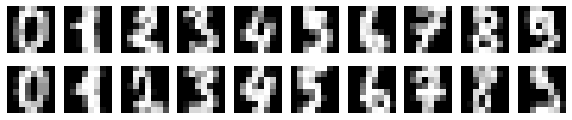

In [37]:
k = 10
_, axes = plt.subplots(2, k, figsize=(1 * k, 2))
axes = axes.flatten()

for img, ax in zip(X, axes):
    draw_image(img, ax)
plt.show()

In [49]:
pca = PCA(n_components=10)
pca.fit(X)

X_pca = pca.transform(X)

In [50]:
pca.explained_variance_ratio_.sum()

0.9031894021597247

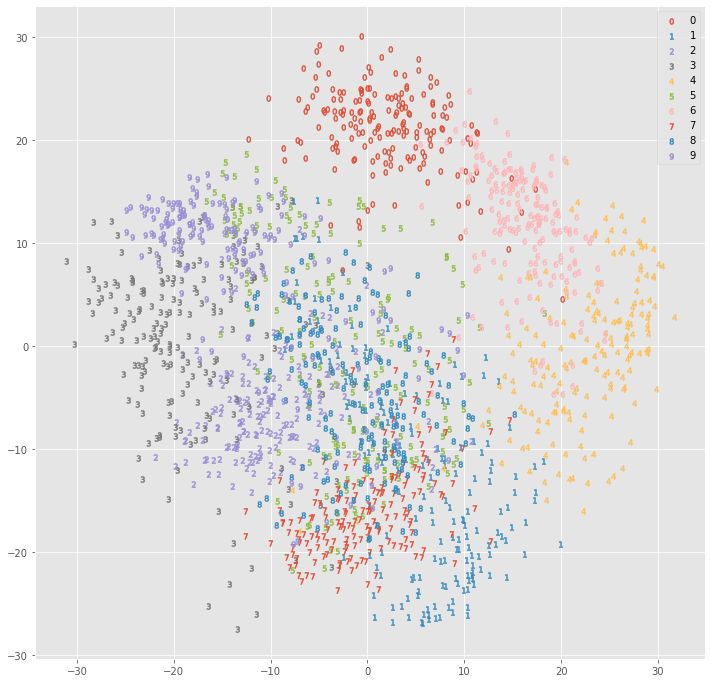

In [51]:
_, ax = plt.subplots(1, 1, figsize=(12, 12))

for c in range(10):
    Xl = X_pca[y == c]
    ax.scatter(Xl[:, 0], Xl[:, 1], marker=f'${c}$', label=f'{c}')
    
ax.legend()
plt.show()

Применим теперь TSNE:

In [52]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

In [53]:
# ти-сни

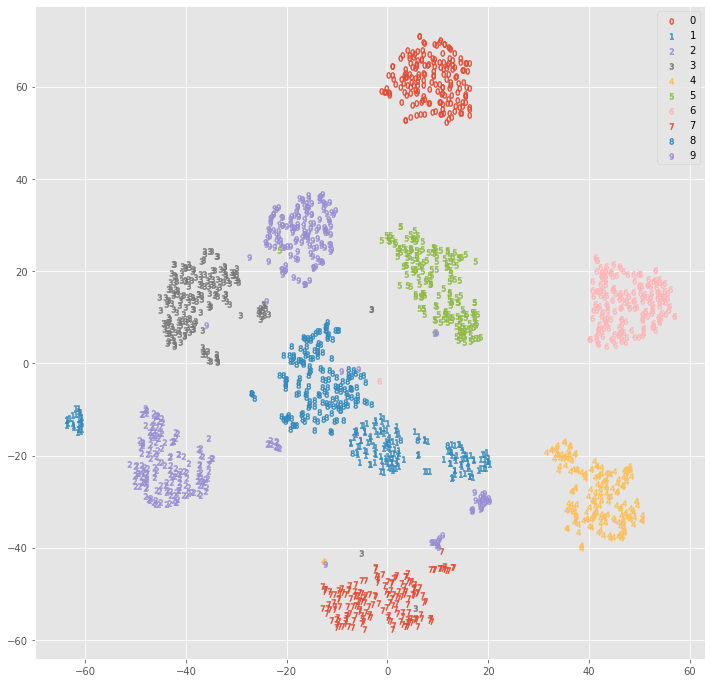

In [63]:
_, ax = plt.subplots(1, 1, figsize=(12, 12))

for c in range(10):
    Xl = X_tsne[y == c]
    ax.scatter(Xl[:, 0], Xl[:, 1], marker=f'${c}$', label=f'{c}')
    
ax.legend()
plt.show()

Параметры:

In [67]:
# 64

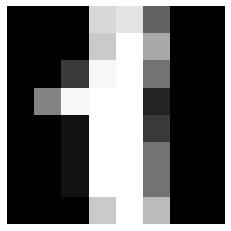

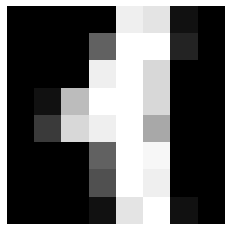

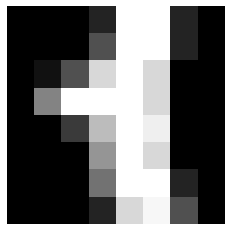

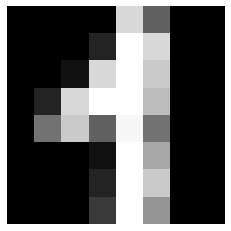

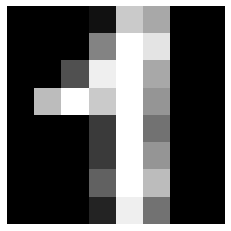

In [72]:
for img in X[(y == 1) & (X_tsne[:, 0] > -60)][:5]:
    draw_image(img)

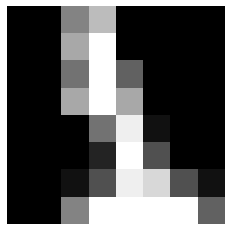

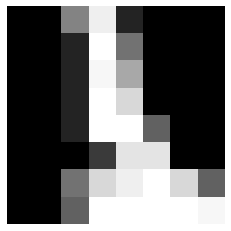

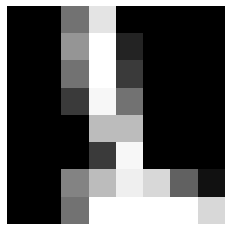

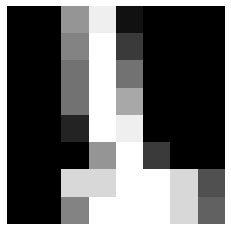

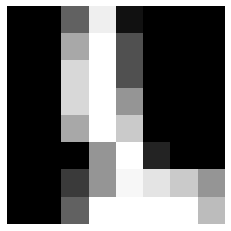

In [73]:
#for img in X[(y == 1) & (X_tsne[:, 0] > -20) & (X_tsne[:, 0] < 0) & (X_tsne[:, 1] > 0)]:
for img in X[(y == 1) & (X_tsne[:, 0] < -60)][:5]:
    draw_image(img)

In [55]:
output = wg.Output()

def viz(perplexity, early_exaggeration, angle):
    tsne = TSNE(perplexity=perplexity, 
                early_exaggeration=early_exaggeration,
                metric='euclidean',
                angle=angle,
                n_jobs=-1)
    X_tsne = tsne.fit_transform(X)

    with output:
        output.clear_output(wait=True)
        
        _, ax = plt.subplots(1, 1, figsize=(8, 8))
        for c in range(10):
            Xl = X_tsne[y == c]
            ax.scatter(Xl[:, 0], Xl[:, 1], marker=f'${c}$', label=f'{c}')

        ax.legend()
        plt.show()
    
wg.interact(viz,
            perplexity=wg.FloatSlider(min=5., max=50., value=30., step=1),
            early_exaggeration=wg.FloatSlider(min=1., max=50., value=12., step=1),
            metric=wg.Select(options=[]),
            angle=wg.FloatSlider(min=0.2, max=0.8, value=0.5, step=0.05))
display(output)

interactive(children=(FloatSlider(value=30.0, description='perplexity', max=50.0, min=5.0, step=1.0), FloatSli…

Output()